## Problem Statement

### Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Installing and Importing the necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install xgboost -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier

## Import Dataset

In [ ]:
df = pd.read_csv('EasyVisa.csv')
data = df.copy()

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [ ]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


#### Understand the shape of the dataset

In [ ]:
data.shape

(25480, 12)

#### Check the data types of the columns for the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [ ]:
data.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


#### Fixing the negative values in number of employees columns

In [ ]:
data['no_of_employees'].apply(lambda x: 0 if x < 0 else x)

,no_of_employees
0,14513
1,2412
2,44444
3,98
4,1082
...,...
25475,2601
25476,3274
25477,1121
25478,1918


#### Let's check the count of each unique category in each of the categorical variables

In [ ]:
data['case_id'].value_counts().shape[0]

25480

In [ ]:
data['continent'].value_counts().shape[0]

6

In [ ]:
data['education_of_employee'].value_counts().shape[0]

4

In [ ]:
data['has_job_experience'].value_counts().shape[0]

2

In [ ]:
data['has_job_experience'].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
data['requires_job_training'].value_counts().shape[0]

2

In [ ]:
data['requires_job_training'].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
data['region_of_employment'].value_counts().shape[0]

5

In [ ]:
data['unit_of_wage'].value_counts().shape[0]

4

In [ ]:
data['full_time_position'].value_counts().shape[0]

2

In [ ]:
data['full_time_position'].unique()

array(['Y', 'N'], dtype=object)

In [ ]:
data['case_status'].value_counts().shape[0]

2

In [ ]:
data['case_status'].unique()

array(['Denied', 'Certified'], dtype=object)

### Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on education of employee

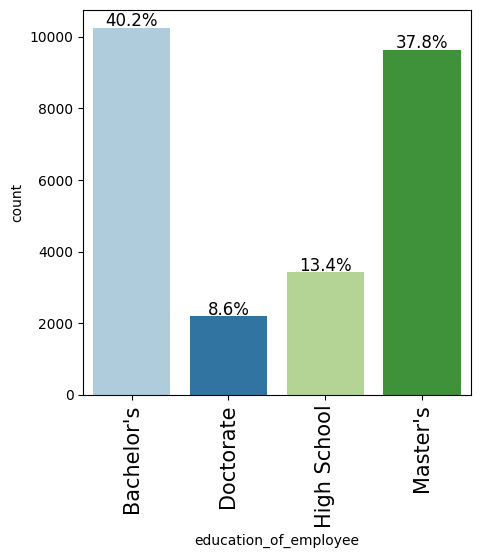

In [ ]:
labeled_barplot(data, 'education_of_employee', True)

* Most of the employees have completed their bachelor's and it could be because their salary demands are lower.
* Next is master's because they are the ones who have good amount of knowledge of the field they working in and also can contribute effectively.
* Doctorate's are low in percentage because they are mostly involved in research and not working for a company.

#### Observations on region of employment

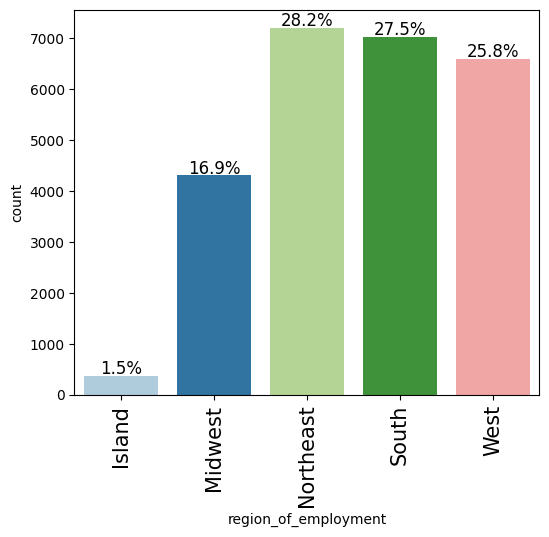

In [ ]:
labeled_barplot(data, 'region_of_employment', True)

* Islands have the lowest number of people working because very few people live there.
* Northeast have the highest percentage of people working.

#### Observations on job experience

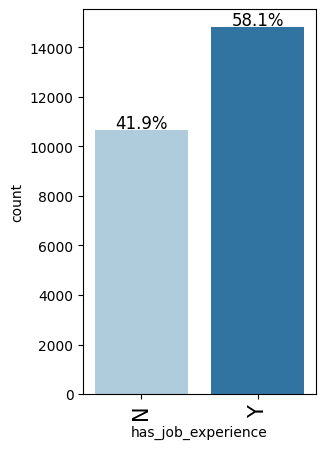

In [ ]:
labeled_barplot(data, 'has_job_experience', True)

* 58.1% have job experience because its easier for people with job experience to get a job.
* 41.9% of people do not have a job experience.

#### Observations on case status

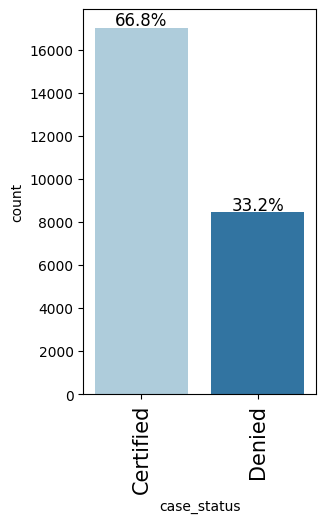

In [ ]:
labeled_barplot(data, 'case_status', True)

* 66.8% of people are certified for visa.
* 33.2% are denied for visa.

### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
data['unit_of_wage'].unique()

array(['Hour', 'Year', 'Week', 'Month'], dtype=object)

#### Does higher education increase the chances of visa certification for well-paid jobs abroad?

In [ ]:
def normalize_wages(row):
  unit = row['unit_of_wage']
  if unit == 'Hour':
    return row['prevailing_wage'] * 40 * 52
  elif unit == 'Week':
    return row['prevailing_wage'] * 52
  elif unit == 'Month':
    return row['prevailing_wage'] * 12
  else:
    return row['prevailing_wage']

data['annual_wage'] = data.apply(normalize_wages, axis=1)

In [ ]:
threshold = data['annual_wage'].median()
data['well_paid'] = data['annual_wage'] > threshold

case_status            Certified  Denied    All
education_of_employee                          
All                         8049    4691  12740
Bachelor's                  3049    2172   5221
Master's                    3764    1221   4985
High School                  570    1167   1737
Doctorate                    666     131    797
------------------------------------------------------------------------------------------------------------------------


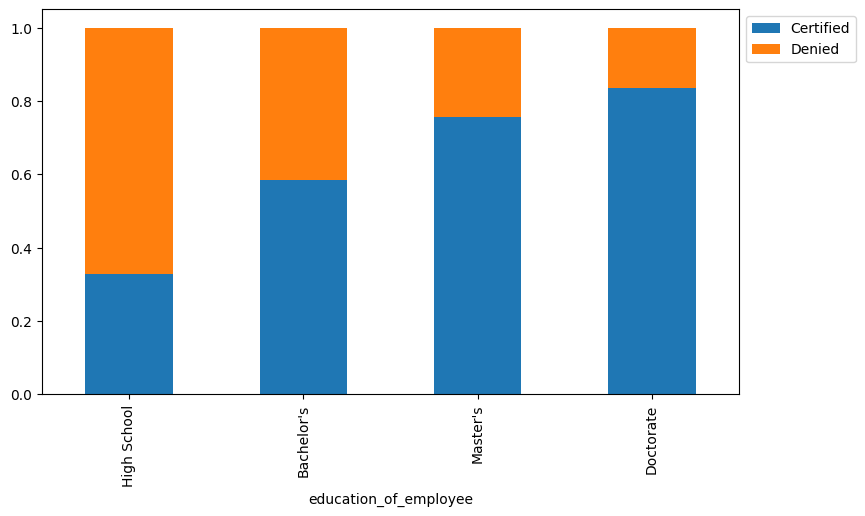

In [ ]:
stacked_barplot(data[data['well_paid'] == True], 'education_of_employee', 'case_status')

* Normalized the wages by taking annual wages.
* Taking threshold as median for well paid jobs.
* Using education as independent variable we use stacked barplot on the case_status variable.

* As education increases we can see that visa is certified for well paid jobs and it is evident as well because people with higher education can contribute more effectively to the work in the company.

#### How does visa status vary across different continents?

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


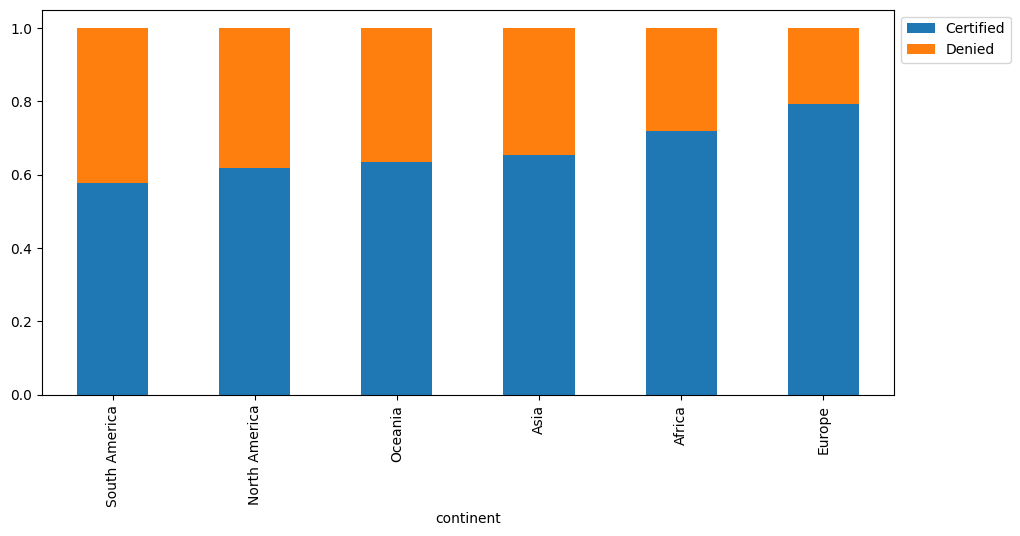

In [ ]:
stacked_barplot(data, 'continent', 'case_status')

#### Does having prior work experience influence the chances of visa certification for career opportunities abroad?

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


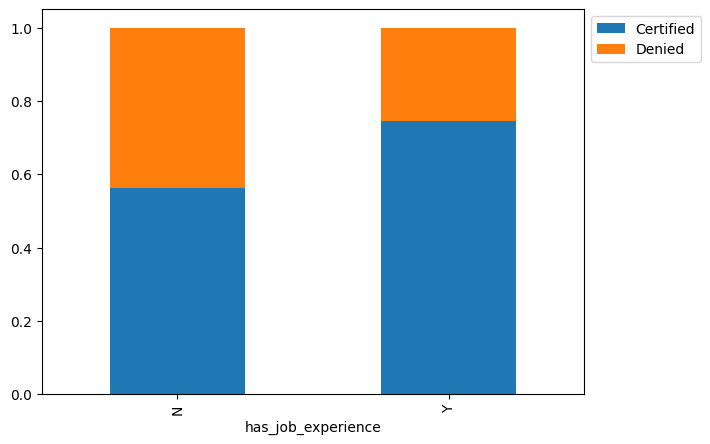

In [ ]:
stacked_barplot(data, 'has_job_experience', 'case_status')

* People who have work experience will have a higher chance of getting hired in jobs so they have a higher chance of getting their visas approved.

#### Is the prevailing wage consistent across all regions of the US?

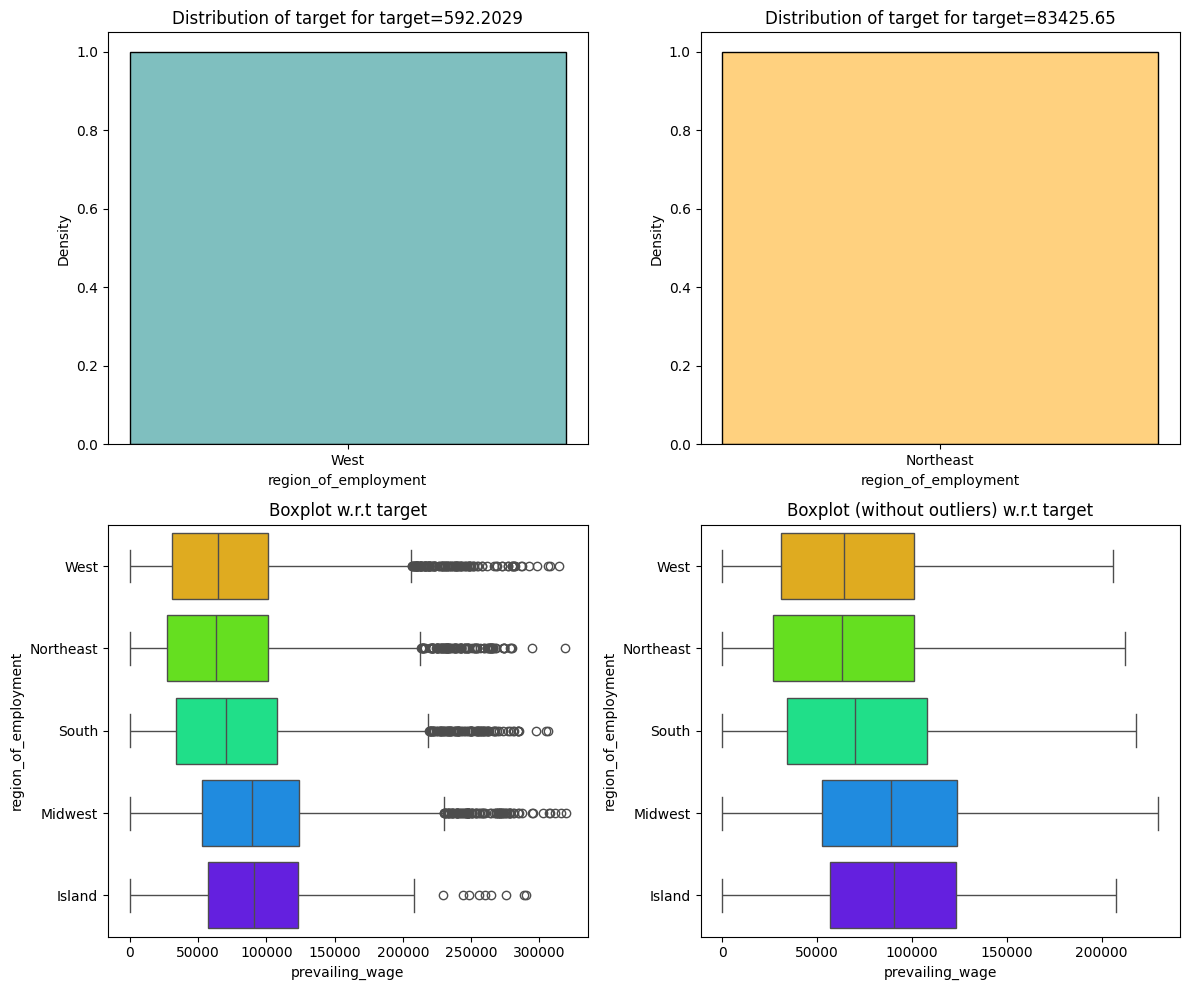

In [ ]:
distribution_plot_wrt_target(data, 'region_of_employment', 'prevailing_wage')

* It is not consistent because there is a lot of right skewness due to outliers on the right of the boxplot.

#### Does visa status vary with changes in the prevailing wage set to protect both local talent and foreign workers?

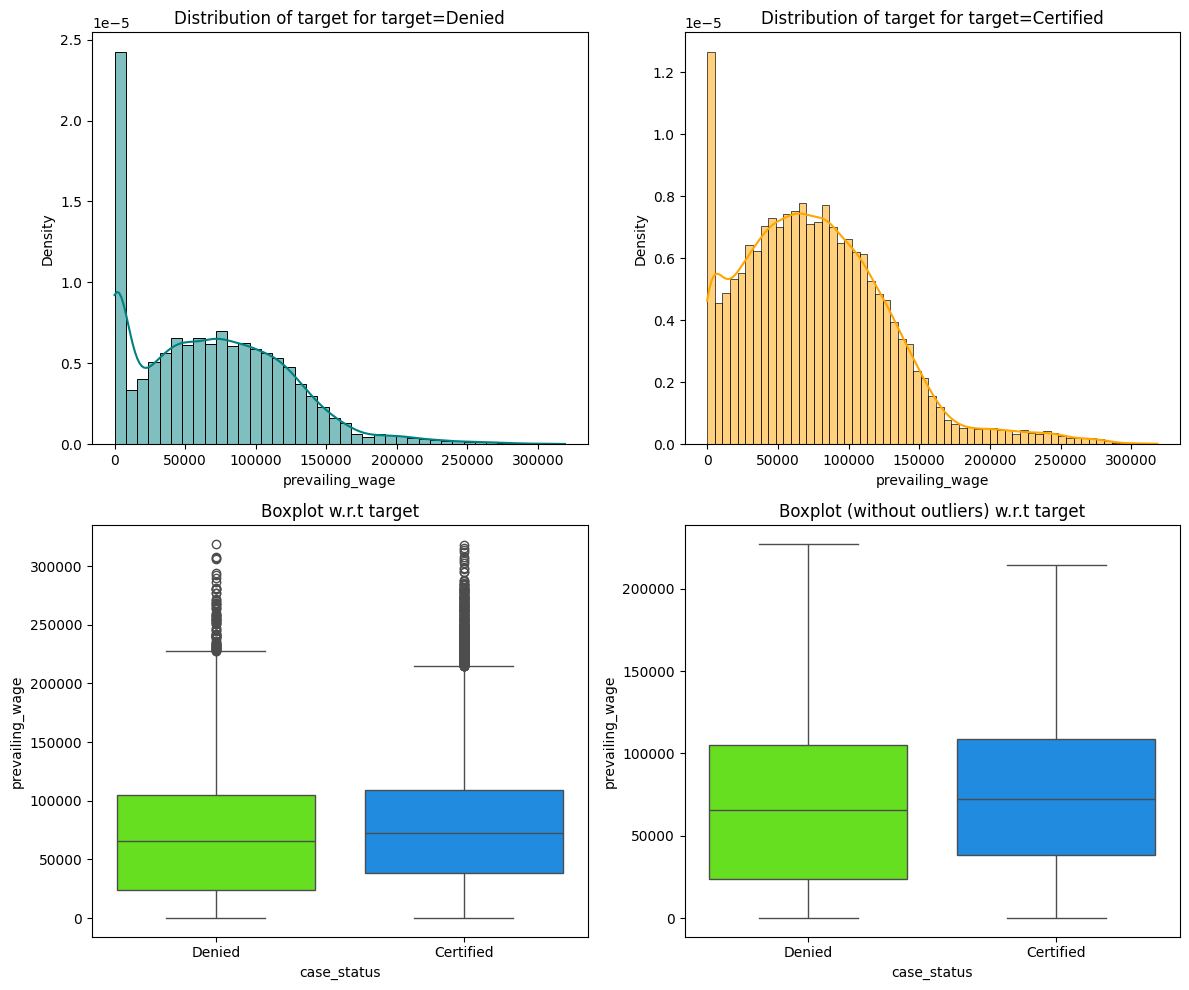

In [ ]:
distribution_plot_wrt_target(data, 'prevailing_wage', 'case_status')

* It does not have much difference between people who are denied visa and who are certified
* Since there is a shortage of workforce so its almost balanced to grant visas to foreign workers but also ensuring that local workers are also given equal opportunity based on the denied target.

#### Does the unit of prevailing wage (Hourly, Weekly, etc.) have any impact on the likelihood of visa application certification?

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


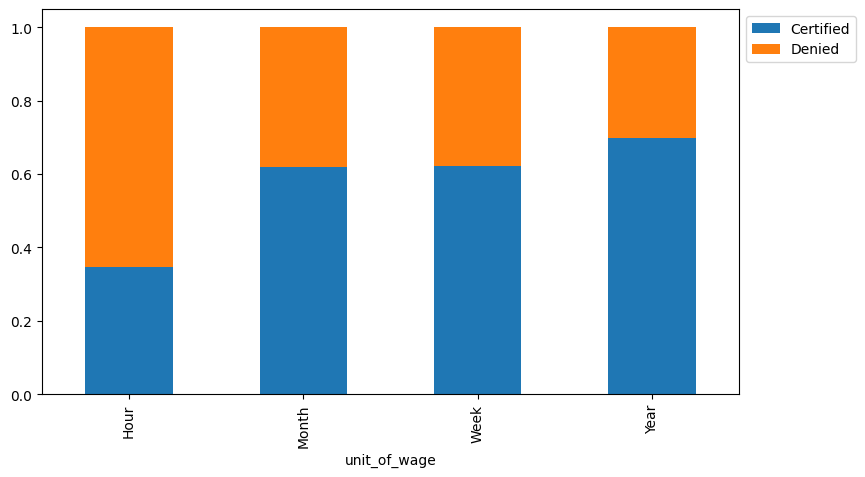

In [ ]:
stacked_barplot(data, 'unit_of_wage', 'case_status')

* The hourly paid workers are denied visas most probably because their work might not be highly paid and also they might lose their job in the time to come so there is a lower chance of their acceptance.
* On the other hand, people who are paid yearly might be at very high managerial positions like CEOs, CFOs, etc which makes them a lot of money and they might be certified more than others.

## Data Pre-processing

### Outlier Check

In [ ]:
def plot_individual_boxplots(df):
    numeric_cols = df.select_dtypes(include=['number']).columns

    for col in numeric_cols:
        plt.figure(figsize=(6, 2))
        sns.boxplot(x=df[col], color='skyblue')
        plt.title(f'Boxplot for {col}')
        plt.tight_layout()
        plt.show()

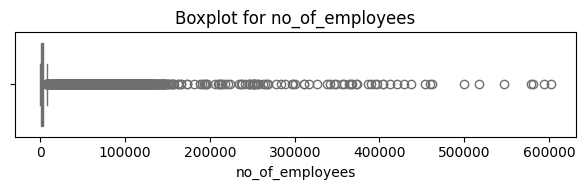

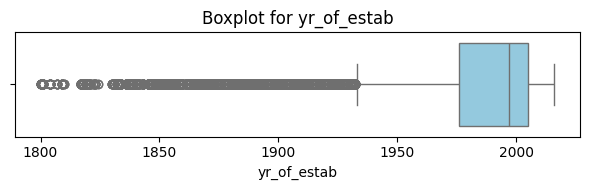

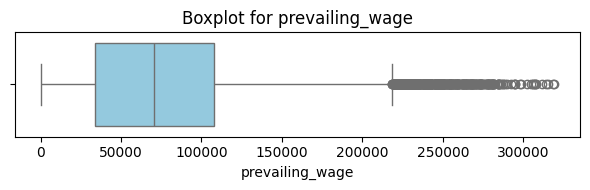

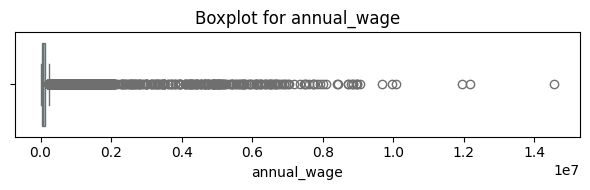

In [ ]:
plot_individual_boxplots(data)

### Data Preparation for modeling

In [ ]:
X = data.drop(['prevailing_wage', 'unit_of_wage', 'case_status', 'case_id', 'well_paid'], axis=1)
y = data['case_status']

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_temp['has_job_experience'] = X_temp['has_job_experience'].apply(lambda x: 1 if x == 'Y' else 0)
X_test['has_job_experience'] = X_test['has_job_experience'].apply(lambda x: 1 if x == 'Y' else 0)
X_temp['requires_job_training'] = X_temp['requires_job_training'].apply(lambda x: 1 if x == 'Y' else 0)
X_test['requires_job_training'] = X_test['requires_job_training'].apply(lambda x: 1 if x == 'Y' else 0)
X_temp['full_time_position']   = X_temp['full_time_position'].apply(lambda x: 1 if x == 'Y' else 0)
X_test['full_time_position'] = X_test['full_time_position'].apply(lambda x: 1 if x == 'Y' else 0)

In [ ]:
y_temp = y_temp.apply(lambda x: 1 if x == 'Certified' else 0)
y_test = y_test.apply(lambda x: 1 if x == 'Denied' else 0)

In [ ]:
education_of_employee = {'High School': 0, "Bachelor's": 1, "Master's": 2, "Doctorate": 3}
X_temp['education_of_employee'] = X_temp['education_of_employee'].map(education_of_employee)
X_test['education_of_employee'] = X_test['education_of_employee'].map(education_of_employee)

In [ ]:
X_temp = pd.get_dummies(X_temp, columns=['region_of_employment', 'continent'])
X_test = pd.get_dummies(X_test, columns=['region_of_employment', 'continent'])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

## Model Building

### Model Evaluation Criterion

- Choose the primary metric to evaluate the model on
- Elaborate on the rationale behind choosing the metric

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The `model_performance_classification_sklearn` function will be used to check the model performance of models.
* The `confusion_matrix_sklearn` function will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with Original data

In [ ]:
models = []

models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric='logloss')))

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.986013986013986
Random forest: 0.999907986750092
GBM: 0.8759661391240339
Adaboost: 0.8836032388663968
dtree: 1.0
XGBoost: 0.9311740890688259

Validation Performance:

Bagging: 0.7675518370316479
Random forest: 0.8406693343033831
GBM: 0.8672244452528192
Adaboost: 0.8817751909785376
dtree: 0.7420880320116406
XGBoost: 0.850491087668243


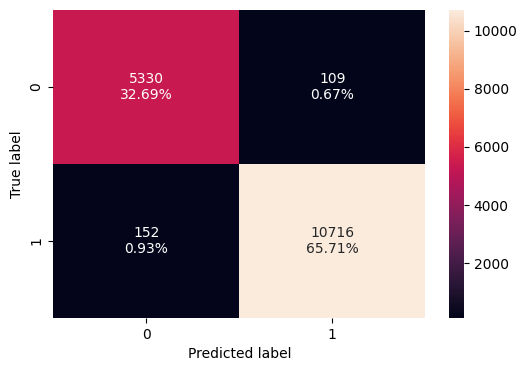

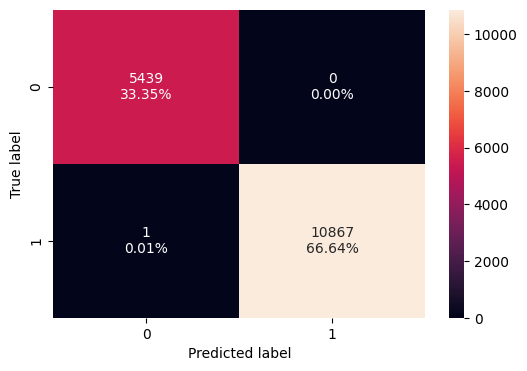

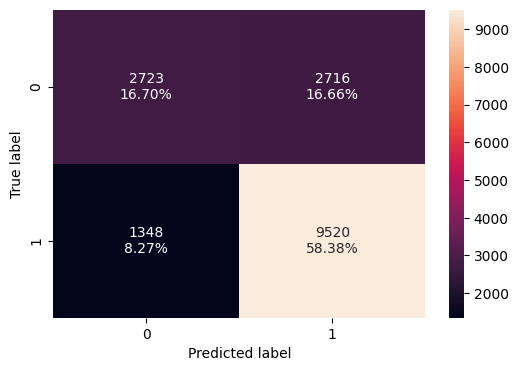

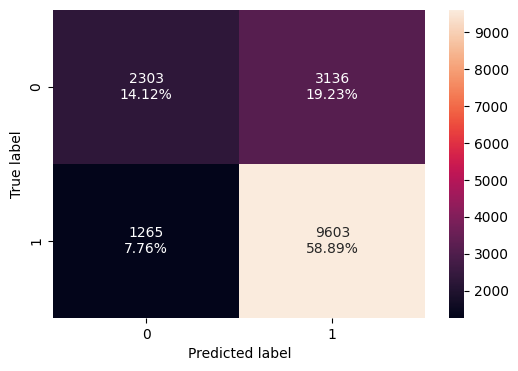

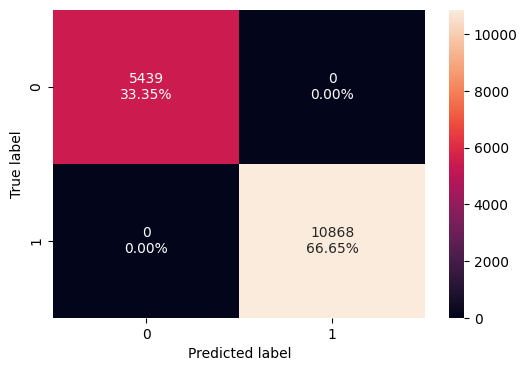

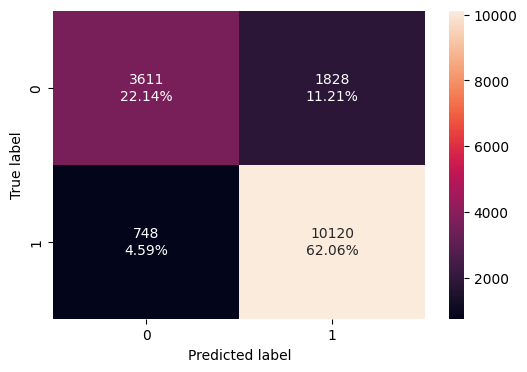

In [ ]:
for name, model in models:
  confusion_matrix_sklearn(model, X_train, y_train)

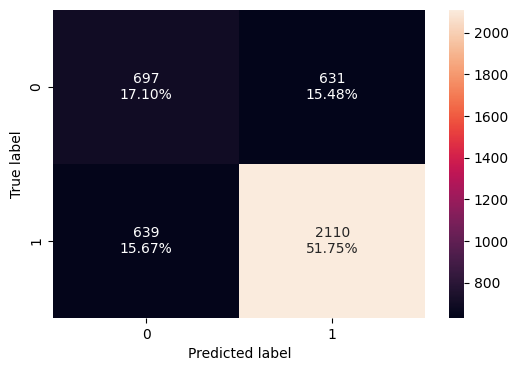

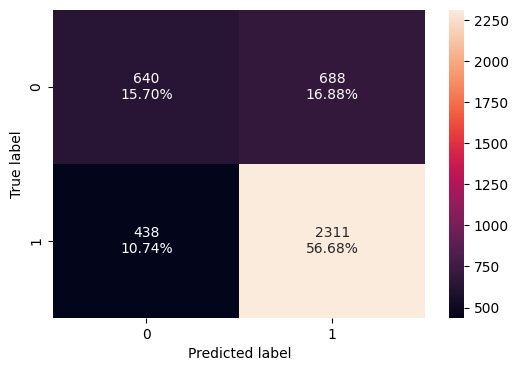

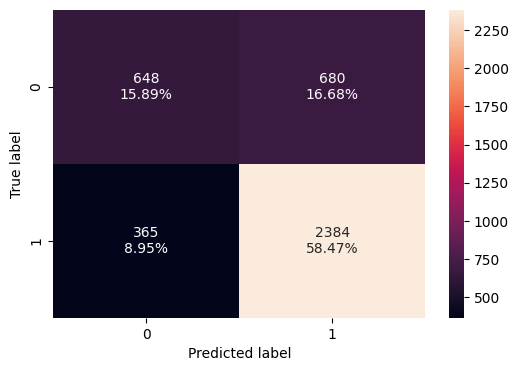

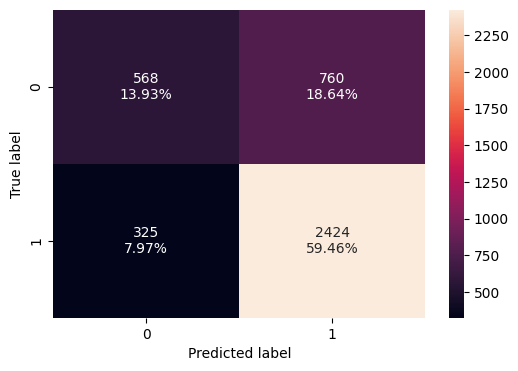

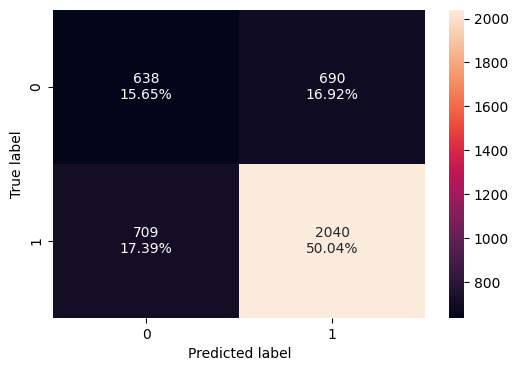

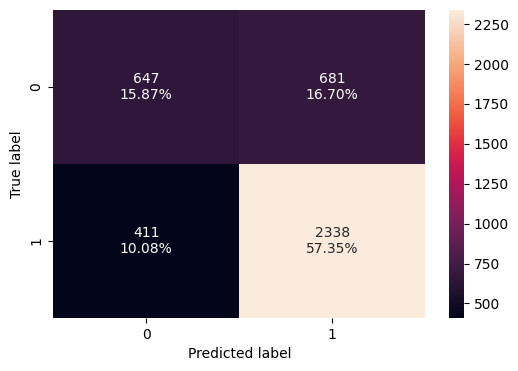

In [ ]:
for name, model in models:
  confusion_matrix_sklearn(model, X_val, y_val)

### Model Building with Oversampled data

In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 10868
Before Oversampling, counts of label 'No': 5439 

After Oversampling, counts of label 'Yes': 10868
After Oversampling, counts of label 'No': 10868 

After Oversampling, the shape of train_X: (21736, 18)
After Oversampling, the shape of train_y: (21736,) 



In [ ]:
models = []

models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric='logloss')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9796650717703349
Random forest: 1.0
GBM: 0.840264998159735
Adaboost: 0.8027235921972764
dtree: 1.0
XGBoost: 0.9017298490982701

Validation Performance:

Bagging: 0.7395416515096399
Random forest: 0.803564932702801
GBM: 0.8250272826482358
Adaboost: 0.7955620225536558
dtree: 0.71989814477992
XGBoost: 0.8239359767188068


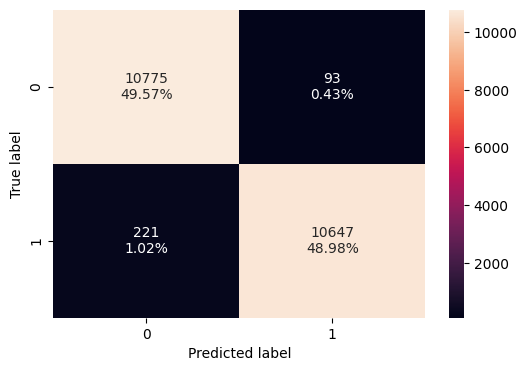

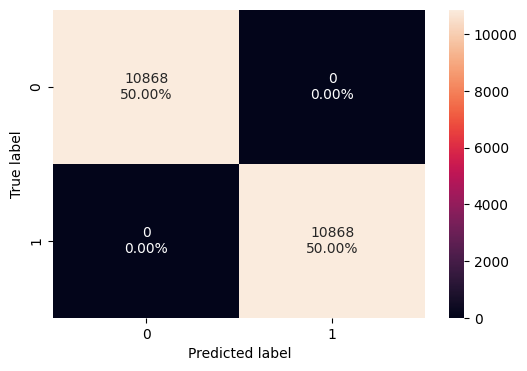

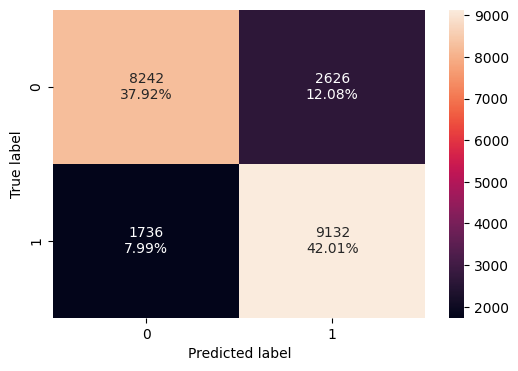

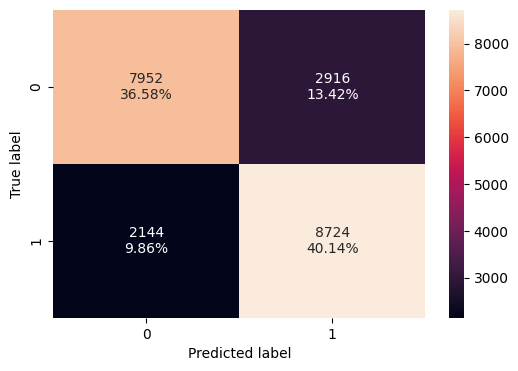

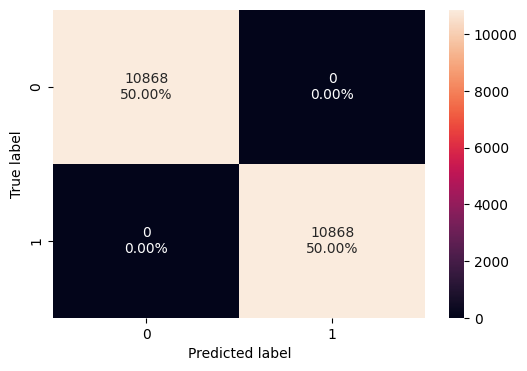

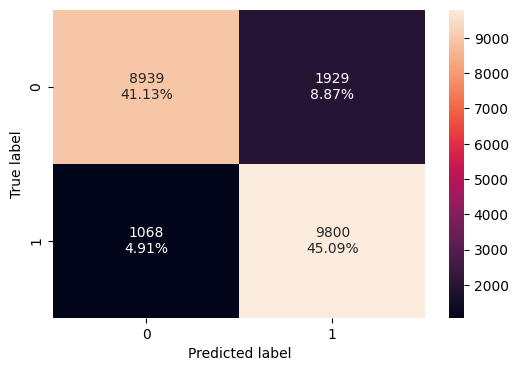

In [ ]:
for name, model in models:
  confusion_matrix_sklearn(model, X_train_over, y_train_over)

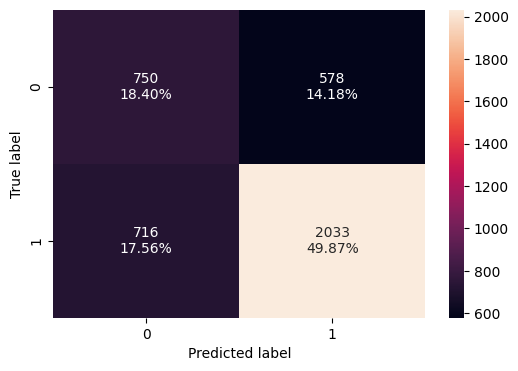

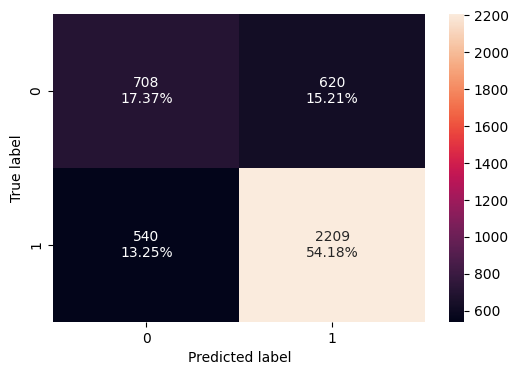

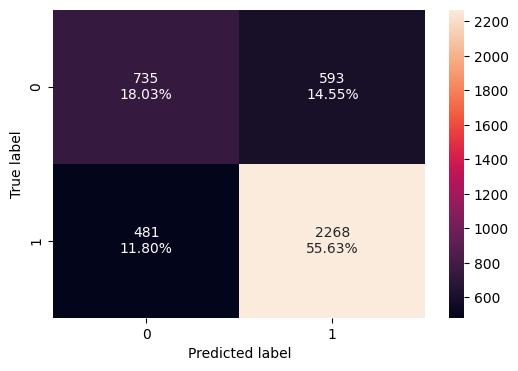

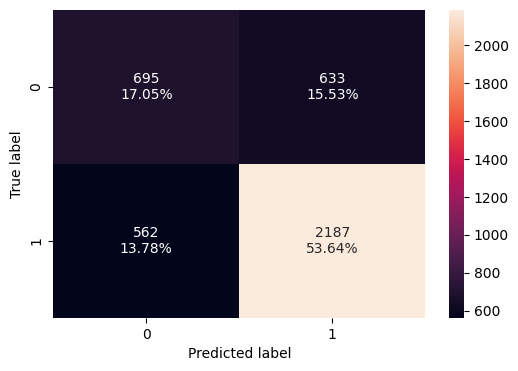

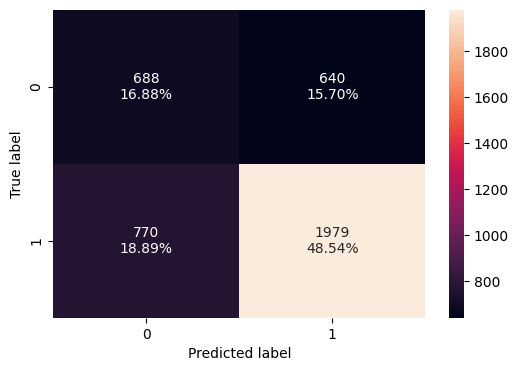

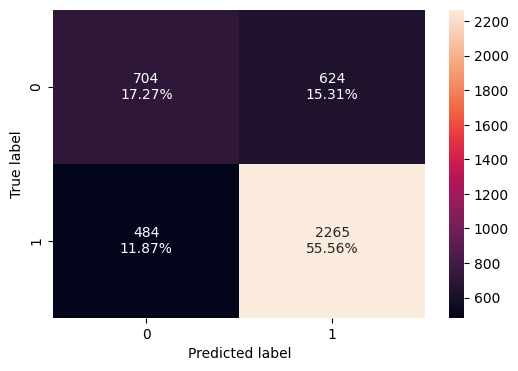

In [ ]:
for name, model in models:
  confusion_matrix_sklearn(model, X_val, y_val)

In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9797, Validation Score: 0.7395, Difference: 0.2401
Random forest: Training Score: 1.0000, Validation Score: 0.8036, Difference: 0.1964
GBM: Training Score: 0.8403, Validation Score: 0.8250, Difference: 0.0152
Adaboost: Training Score: 0.8027, Validation Score: 0.7956, Difference: 0.0072
dtree: Training Score: 1.0000, Validation Score: 0.7199, Difference: 0.2801
XGBoost: Training Score: 0.9017, Validation Score: 0.8239, Difference: 0.0778


### Model Building with Undersampled data

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 10868
Before Under Sampling, counts of label 'No': 5439 

After Under Sampling, counts of label 'Yes': 5439
After Under Sampling, counts of label 'No': 5439 

After Under Sampling, the shape of train_X: (10878, 18)
After Under Sampling, the shape of train_y: (10878,) 



In [ ]:
models = []

models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric='logloss')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9658025372311086
Random forest: 1.0
GBM: 0.7179628608200037
Adaboost: 0.6771465342893914
dtree: 1.0
XGBoost: 0.8687258687258688

Validation Performance:

Bagging: 0.5871225900327391
Random forest: 0.6405965805747544
GBM: 0.6995271007639141
Adaboost: 0.672608221171335
dtree: 0.6024008730447435
XGBoost: 0.6580574754456165


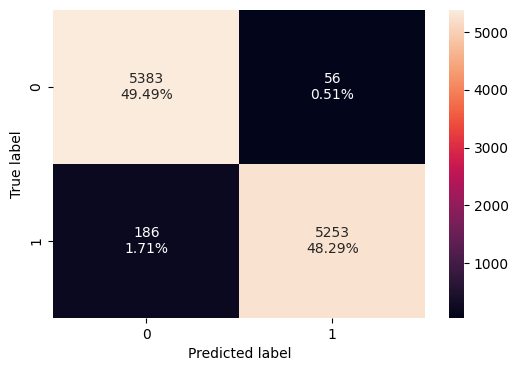

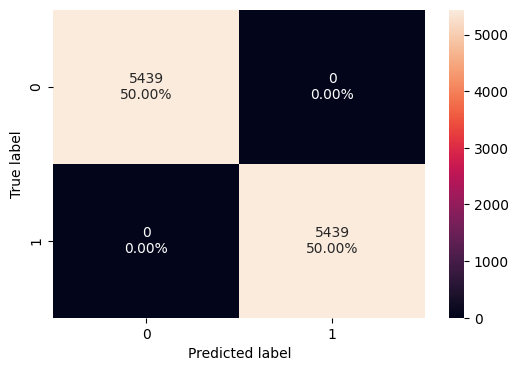

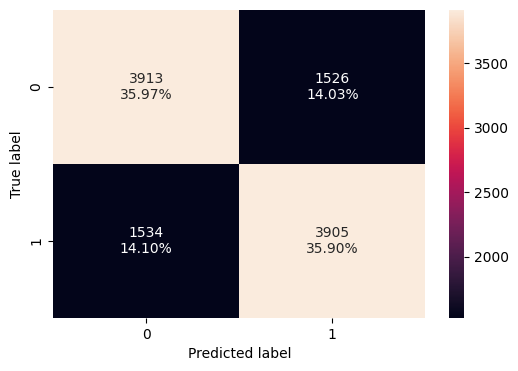

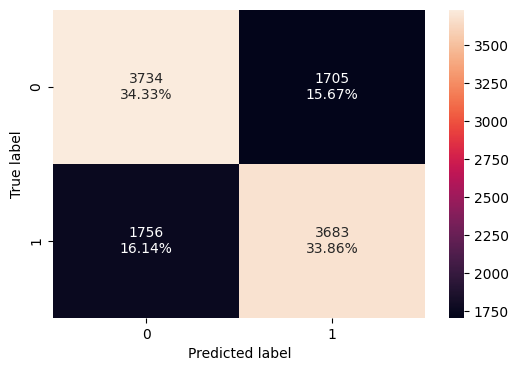

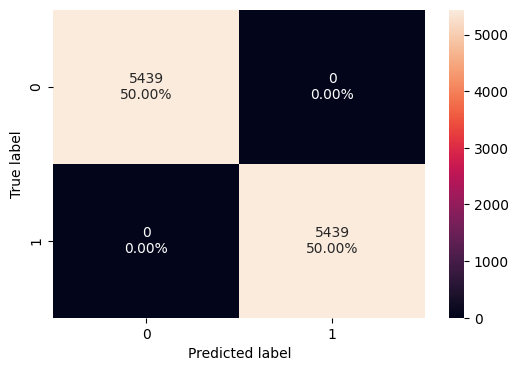

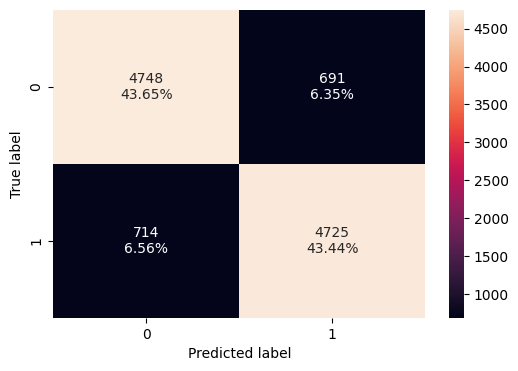

In [ ]:
for name, model in models:
  confusion_matrix_sklearn(model, X_train_un, y_train_un)

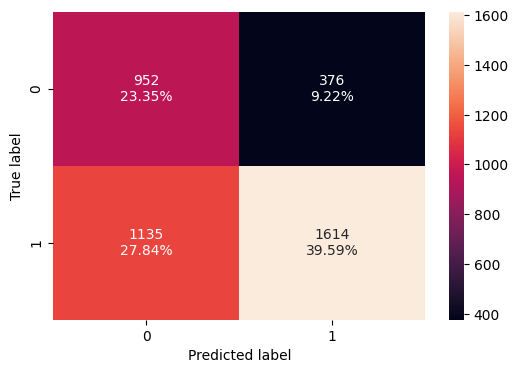

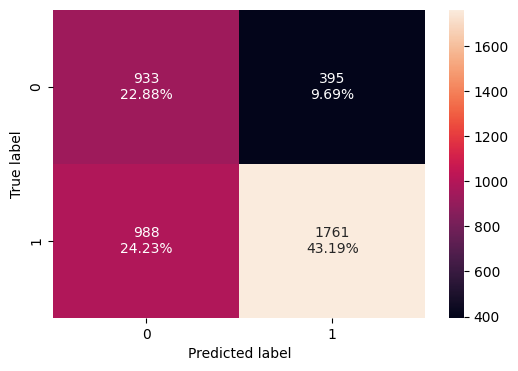

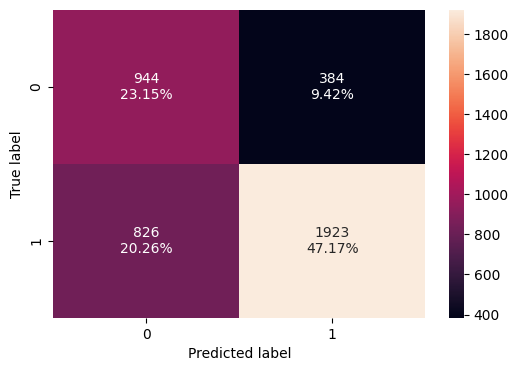

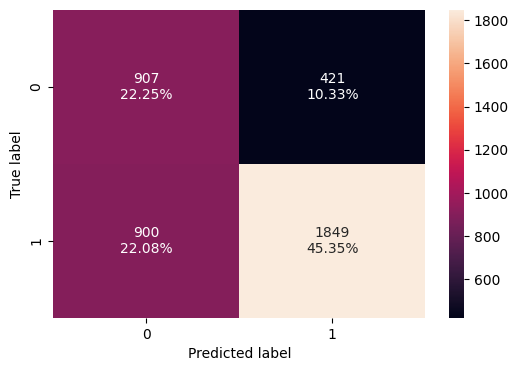

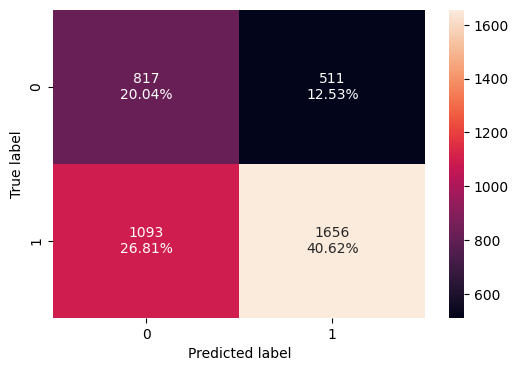

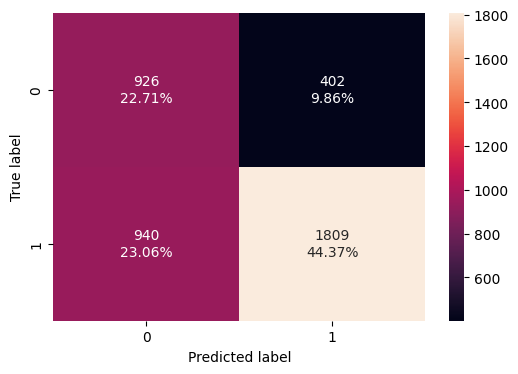

In [ ]:
for name, model in models:
  confusion_matrix_sklearn(model, X_val, y_val)

In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9658, Validation Score: 0.5871, Difference: 0.3787
Random forest: Training Score: 1.0000, Validation Score: 0.6406, Difference: 0.3594
GBM: Training Score: 0.7180, Validation Score: 0.6995, Difference: 0.0184
Adaboost: Training Score: 0.6771, Validation Score: 0.6726, Difference: 0.0045
dtree: Training Score: 1.0000, Validation Score: 0.6024, Difference: 0.3976
XGBoost: Training Score: 0.8687, Validation Score: 0.6581, Difference: 0.2107


* We choose Gradient Boosting, Adaboost and XGBoost as they have the best possible generalization between the training and validation sets. We train Adaboost on undersampled data, Gradient boosting on both undersampled and oversampled as they have very similar performance and XGBoost on oversampled data.

## Hyperparameter Tuning

**Best practices for hyperparameter tuning in AdaBoost:**

`n_estimators`:

- Start with a specific number (50 is used in general) and increase in steps: 50, 75, 85, 100

- Use fewer estimators (e.g., 50 to 100) if using complex base learners (like deeper decision trees)

- Use more estimators (e.g., 100 to 150) when learning rate is low (e.g., 0.1 or lower)

- Avoid very high values unless performance keeps improving on validation

`learning_rate`:

- Common values to try: 1.0, 0.5, 0.1, 0.01

- Use 1.0 for faster training, suitable for fewer estimators

- Use 0.1 or 0.01 when using more estimators to improve generalization

- Avoid very small values (< 0.01) unless you plan to use many estimators (e.g., >500) and have sufficient data


---

**Best practices for hyperparameter tuning in Random Forest:**


`n_estimators`:

* Start with a specific number (50 is used in general) and increase in steps: 50, 75, 100, 125
* Higher values generally improve performance but increase training time
* Use 100-150 for large datasets or when variance is high


`min_samples_leaf`:

* Try values like: 1, 2, 4, 5, 10
* Higher values reduce model complexity and help prevent overfitting
* Use 1–2 for low-bias models, higher (like 5 or 10) for more regularized models
* Works well in noisy datasets to smooth predictions


`max_features`:

* Try values: `"sqrt"` (default for classification), `"log2"`, `None`, or float values (e.g., `0.3`, `0.5`)
* `"sqrt"` balances between diversity and performance for classification tasks
* Lower values (e.g., `0.3`) increase tree diversity, reducing overfitting
* Higher values (closer to `1.0`) may capture more interactions but risk overfitting


`max_samples` (for bootstrap sampling):

* Try float values between `0.5` to `1.0` or fixed integers
* Use `0.6–0.9` to introduce randomness and reduce overfitting
* Smaller values increase diversity between trees, improving generalization

---

**Best practices for hyperparameter tuning in Gradient Boosting:**

`n_estimators`:

* Start with 100 (default) and increase: 100, 200, 300, 500
* Typically, higher values lead to better performance, but they also increase training time
* Use 200–500 for larger datasets or complex problems
* Monitor validation performance to avoid overfitting, as too many estimators can degrade generalization


`learning_rate`:

* Common values to try: 0.1, 0.05, 0.01, 0.005
* Use lower values (e.g., 0.01 or 0.005) if you are using many estimators (e.g., > 200)
* Higher learning rates (e.g., 0.1) can be used with fewer estimators for faster convergence
* Always balance the learning rate with `n_estimators` to prevent overfitting or underfitting


`subsample`:

* Common values: 0.7, 0.8, 0.9, 1.0
* Use a value between `0.7` and `0.9` for improved generalization by introducing randomness
* `1.0` uses the full dataset for each boosting round, potentially leading to overfitting
* Reducing `subsample` can help reduce overfitting, especially in smaller datasets


`max_features`:

* Common values: `"sqrt"`, `"log2"`, or float (e.g., `0.3`, `0.5`)
* `"sqrt"` (default) works well for classification tasks
* Lower values (e.g., `0.3`) help reduce overfitting by limiting the number of features considered at each split

---

**Best practices for hyperparameter tuning in XGBoost:**

`n_estimators`:

* Start with 50 and increase in steps: 50,75,100,125.
* Use more estimators (e.g., 150-250) when using lower learning rates
* Monitor validation performance
* High values improve learning but increase training time

`subsample`:

* Common values: 0.5, 0.7, 0.8, 1.0
* Use `0.7–0.9` to introduce randomness and reduce overfitting
* `1.0` uses the full dataset in each boosting round; may overfit on small datasets
* Values < 0.5 are rarely useful unless dataset is very large

`gamma`:

* Try values: 0 (default), 1, 3, 5, 8
* Controls minimum loss reduction needed for a split
* Higher values make the algorithm more conservative (i.e., fewer splits)
* Use values > 0 to regularize and reduce overfitting, especially on noisy data


`colsample_bytree`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled per tree
* Lower values (e.g., 0.3 or 0.5) increase randomness and improve generalization
* Use `1.0` when you want all features considered for every tree


`colsample_bylevel`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled at each tree level (i.e., per split depth)
* Lower values help in regularization and reducing overfitting
* Often used in combination with `colsample_bytree` for fine control over feature sampling

---

### Tuning Adaboost classifier with undersampled data

In [ ]:
%%time


Model = AdaBoostClassifier(random_state=1)

param_grid = {
    "n_estimators": [10, 20, 30, 50, 100],
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

scorer = metrics.make_scorer(metrics.recall_score)

randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 10, 'learning_rate': 0.2, 'estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.7962893690134748:
CPU times: user 1.91 s, sys: 272 ms, total: 2.18 s
Wall time: 1min 57s


In [ ]:
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=10,
    learning_rate=0.2,
    estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
)
tuned_adb.fit(X_train_un, y_train_un)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=1),
                   learning_rate=0.2, n_estimators=10, random_state=1)

In [ ]:
adb_train = model_performance_classification_sklearn(tuned_adb, X_train_un, y_train_un)
adb_train

,Accuracy,Recall,Precision,F1
0,0.655268,0.796286,0.62111,0.697873


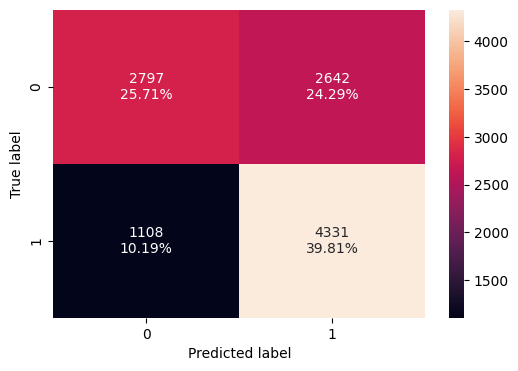

In [ ]:
confusion_matrix_sklearn(tuned_adb, X_train_un, y_train_un)

In [ ]:
adb_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
adb_val

,Accuracy,Recall,Precision,F1
0,0.703949,0.793379,0.773404,0.783264


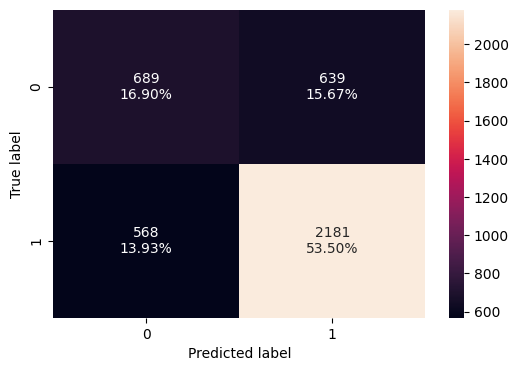

In [ ]:
confusion_matrix_sklearn(tuned_adb, X_val, y_val)

### Tuning gradient boosting model with undersampled data

In [ ]:
%%time

Model = GradientBoostingClassifier(random_state=1)

param_grid = {
    # "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(125,175,25),
    "learning_rate": [0.01, 0.2, 0.05, 1],
    "subsample":[0.8,0.9,1],
    "max_features":[0.5,0.7,1],
    "max_depth": [2, 3, 4],
    "min_samples_split": [2, 5, 10]
}

scorer = metrics.make_scorer(metrics.f1_score)

randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'n_estimators': np.int64(150), 'min_samples_split': 10, 'max_features': 0.5, 'max_depth': 3, 'learning_rate': 0.01} with CV score=0.7058355634203675:
CPU times: user 4.63 s, sys: 376 ms, total: 5.01 s
Wall time: 3min 33s


In [ ]:
tuned_gbm1 = GradientBoostingClassifier(
    subsample=0.8,
    n_estimators=150,
    min_samples_split=10,
    max_features=0.5,
    max_depth=3,
    learning_rate=0.01,
    random_state=42
)
tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(learning_rate=0.01, max_features=0.5,
                           min_samples_split=10, n_estimators=150,
                           random_state=42, subsample=0.8)

In [ ]:
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train_un, y_train_un
)
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.69829,0.730097,0.68643,0.707591


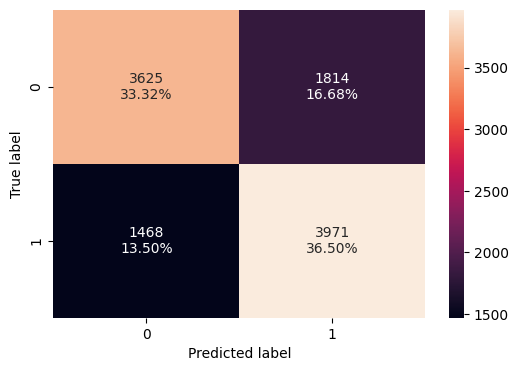

In [ ]:
confusion_matrix_sklearn(tuned_gbm1, X_train_un, y_train_un)

In [ ]:
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.715232,0.734813,0.823817,0.776774


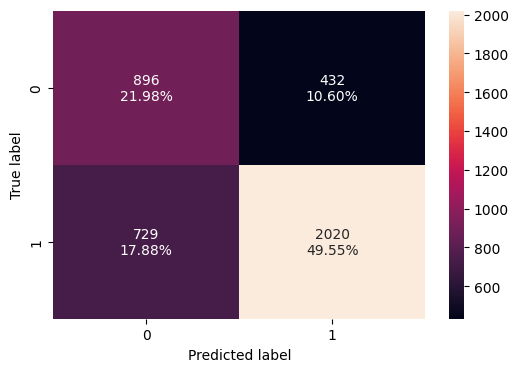

In [ ]:
confusion_matrix_sklearn(tuned_gbm1, X_val, y_val)

### Tuning Gradient Boosting Classifier with Oversampled Data

In [ ]:
%%time

Model = GradientBoostingClassifier(random_state=1)

param_grid = {
    # "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
    "max_depth": [2, 3, 4],
    "min_samples_split": [2, 5, 10]
}


scorer = metrics.make_scorer(metrics.recall_score)


randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1, 'n_estimators': np.int64(125), 'min_samples_split': 2, 'max_features': 0.5, 'max_depth': 2, 'learning_rate': 0.2} with CV score=0.8420169166542127:
CPU times: user 4.87 s, sys: 505 ms, total: 5.37 s
Wall time: 4min 5s


In [ ]:
tuned_gbm2 = GradientBoostingClassifier(
    subsample=1,
    n_estimators=125,
    min_samples_split=2,
    max_features=0.5,
    max_depth=2,
    learning_rate=0.2,
    random_state=42
)
tuned_gbm2.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=0.2, max_depth=2, max_features=0.5,
                           n_estimators=125, random_state=42, subsample=1)

In [ ]:
gbm2_train = model_performance_classification_sklearn(tuned_gbm2, X_train_over, y_train_over)
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.797249,0.841921,0.772869,0.805919


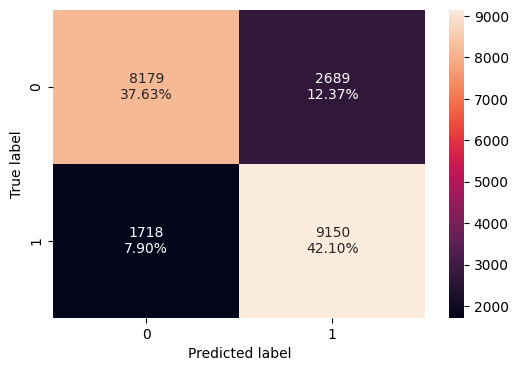

In [ ]:
confusion_matrix_sklearn(tuned_gbm2, X_train_over, y_train_over)

In [ ]:
gbm2_val = model_performance_classification_sklearn(tuned_gbm2, X_val, y_val)
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.731665,0.82721,0.786035,0.806097


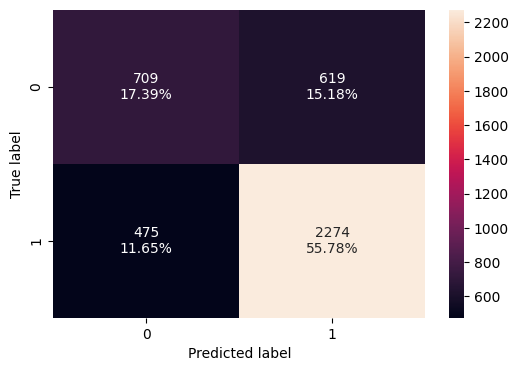

In [ ]:
confusion_matrix_sklearn(tuned_gbm2, X_val, y_val)

### Tuning XGBoost on oversampled data

In [ ]:
xgbclassifier_orig = XGBClassifier(random_state=1)

parameters = {
    'n_estimators': np.arange(50, 250, 50),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.5, 0.7, 0.9, 1],
    'colsample_bytree': [0.5, 0.7, 1],
    'colsample_bylevel': [0.5, 0.7, 1],
    'gamma': [0, 1, 3],
    'scale_pos_weight': [1, 2, 5, 10],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 3, 5]
}

acc_scorer = metrics.make_scorer(metrics.recall_score)

randomized_cv = RandomizedSearchCV(
    estimator=xgbclassifier_orig,
    param_distributions=parameters,
    n_iter=50,
    scoring=acc_scorer,
    cv=5
)

randomized_obj = randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

xgb_tuned_orig = randomized_cv.best_estimator_

xgb_tuned_orig.fit(X_train, y_train)

Best parameters are {'subsample': 0.5, 'scale_pos_weight': 2, 'n_estimators': np.int64(50), 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.5} with CV score=1.0:


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=np.int64(50), n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
xgb_tuned_orig_train = model_performance_classification_sklearn(xgb_tuned_orig, X_train_over, y_train_over)
xgb_tuned_orig_train

,Accuracy,Recall,Precision,F1
0,0.5,1.0,0.5,0.666667


In [ ]:
xgb_tuned_test = model_performance_classification_sklearn(xgb_tuned_orig, X_val, y_val)
xgb_tuned_test

,Accuracy,Recall,Precision,F1
0,0.67427,1.0,0.67427,0.80545


## Model Performance Summary and Final Model Selection

### Final Results of oversampled training data

In [ ]:
final_results_train = pd.DataFrame({"AdaBoost trained with undersampled data": adb_train.iloc[0],
                              "Gradient Boosting trained with oversampled data": gbm2_train.iloc[0],
                              "Gradient Boosting trained with undersampled data": gbm1_train.iloc[0],
                              "XGBoost tuned with oversampled data": xgb_tuned_orig_train.iloc[0]}, index=['Accuracy', 'Recall', 'Precision', 'F1'])

final_results_train

,AdaBoost trained with undersampled data,Gradient Boosting trained with oversampled data,Gradient Boosting trained with undersampled data,XGBoost tuned with oversampled data
Accuracy,0.655268,0.797249,0.698290,0.500000
Recall,0.796286,0.841921,0.730097,1.000000
Precision,0.621110,0.772869,0.686430,0.500000
F1,0.697873,0.805919,0.707591,0.666667


In [ ]:
final_results_val = pd.DataFrame({"AdaBoost on undersampled data tested on validation set": adb_val.iloc[0],
                              "Gradient Boosting on oversampled data tested on validation set": gbm2_val.iloc[0],
                              "Gradient Boosting on undersampled data tested on validation set": gbm1_val.iloc[0],
                              "XGBoost tuned with oversampled data tested on validation set": xgb_tuned_test.iloc[0]}, index=['Accuracy', 'Recall', 'Precision', 'F1'])
final_results_val

,AdaBoost on undersampled data tested on validation set,Gradient Boosting on oversampled data tested on validation set,Gradient Boosting on undersampled data tested on validation set,XGBoost tuned with oversampled data tested on validation set
Accuracy,0.703949,0.731665,0.715232,0.67427
Recall,0.793379,0.827210,0.734813,1.00000
Precision,0.773404,0.786035,0.823817,0.67427
F1,0.783264,0.806097,0.776774,0.80545


In [ ]:
xgb_tuned_orig_test = model_performance_classification_sklearn(xgb_tuned_orig, X_test, y_test)
xgb_tuned_orig_test

,Accuracy,Recall,Precision,F1
0,0.332614,1.0,0.332614,0.49919


In [ ]:
adb_test = model_performance_classification_sklearn(tuned_adb, X_test, y_test)
adb_test

,Accuracy,Recall,Precision,F1
0,0.285518,0.476696,0.226839,0.3074


In [ ]:
gbm1_test = model_performance_classification_sklearn(tuned_gbm1, X_test, y_test)
gbm1_test

,Accuracy,Recall,Precision,F1
0,0.282182,0.325074,0.179772,0.231513


In [ ]:
gbm2_test = model_performance_classification_sklearn(tuned_gbm2, X_test, y_test)
gbm2_test

,Accuracy,Recall,Precision,F1
0,0.261381,0.475516,0.218962,0.299851


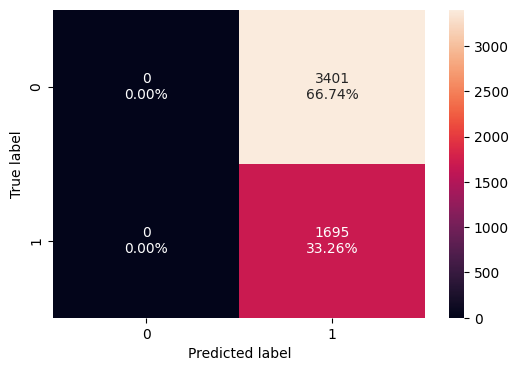

In [ ]:
confusion_matrix_sklearn(xgb_tuned_orig, X_test, y_test)

* We can see that the best performing model is the XGBoost model trained on the original data which gives a very recall value(99.5%) which highly minimizes the chances of granting visa to non-eligible candidates.

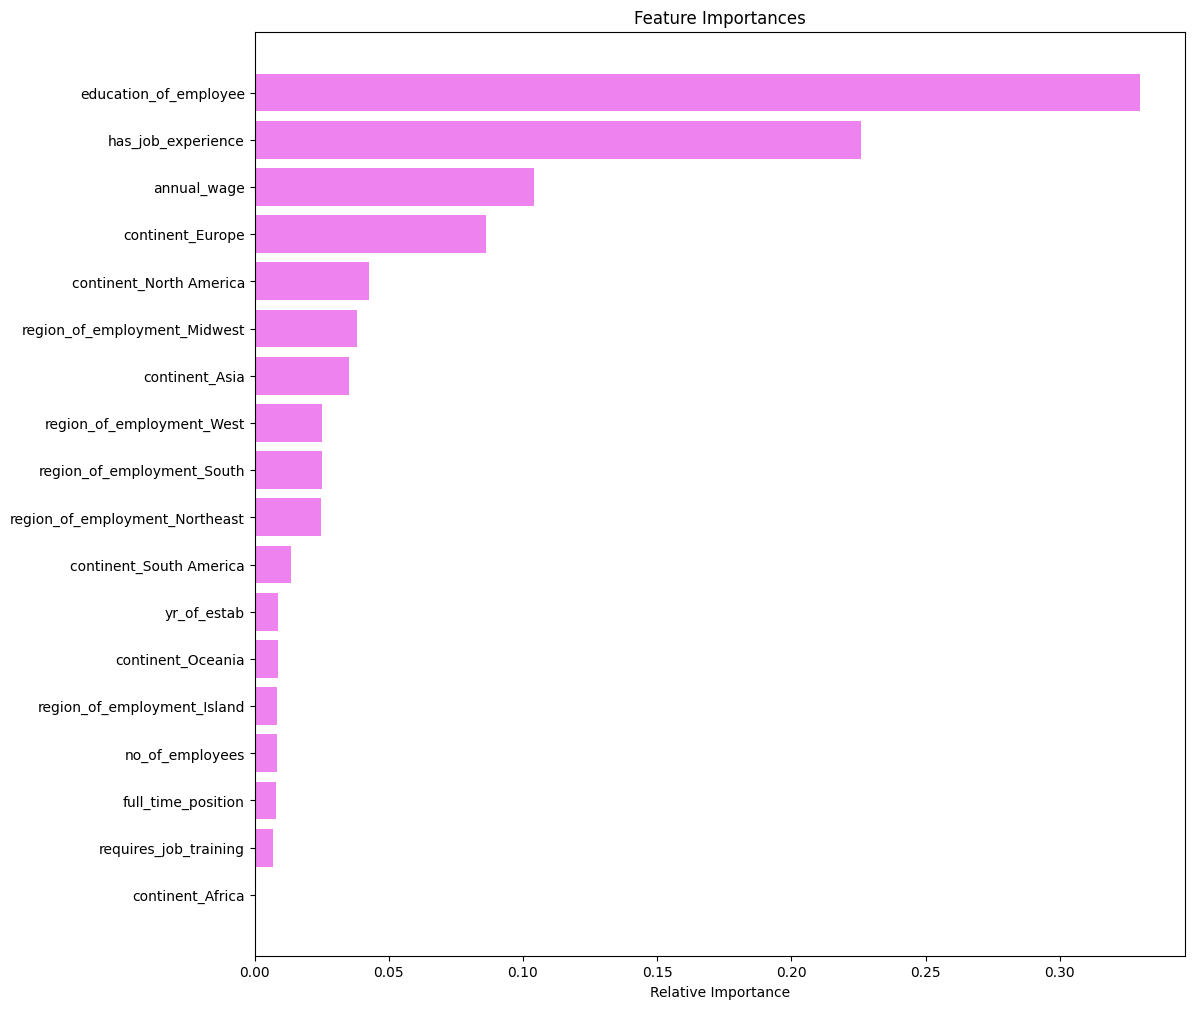

In [ ]:
feature_names = X_train.columns
importances = xgb_tuned_orig.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Education of employee and previous job experience of people applying for visa are given the highest preference.

## Actionable Insights and Recommendations

* From the feature importances we can see that education of employee is the most important factor in applying for foreign jobs and also getting visas approved for this purpose.
* Doctorates are preferred more for visa approval as they are doing research according to the EDA which can support R&D in companies.
* People with already existing job experience can be preferred to be given visas quickly as it shows they have professional experience and proportionally shows an increase in education.
* People from the EU can be granted visas as Europe is developed and also has promising talent for companies. The people from North America might not have a high importance as there is shortage of workforce in the North America.
* If somebody is having a job application from companies in West region they can be granted visas quicker as there might be headquarters of large companies located in that region.
* If education is not high enough and requires job training it can be difficult for them to get visas which might require manual screening which will have to look at annual wage at that company being offered to the candidate as that also is an important criteria.
* If the job of the candidate is not a full time position it might require manual screening as this is not a major feature and might get rejected by the model.
* The most ideal application would be to have high level of education and with job training, good job profile like good salary, full time position, and also having residentship of developed countries like the EU.

<font size=6 color='blue'>Power Ahead</font>
___